In [1]:
#Import library
from numpy import array
from numpy import hstack
from keras.layers import Input
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Flatten
from keras.layers import concatenate
from keras.layers import Dense
from keras.models import Model

In [3]:
#Define split function to convert sequence into input and output
def split_sequence(sequence, n_steps):
  X, y = list (), list ()
  for i in range(len(sequence)):
    end_ix = i + n_steps
    if end_ix > len(sequence):
      break
    seq_x, seq_y = sequence[i:end_ix, :-1], sequence[end_ix-1, -1]
    X.append(seq_x)
    y.append(seq_y)
  return array(X), array(y)

In [4]:
#Define sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
in_seq2 = array([in_seq1[i]+5 for i in range (len(in_seq1))])
out_seq = array([in_seq1[i] + in_seq2[i] for i in range(len(in_seq2))])

In [5]:
#Convert into rows and columns/ 2D structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))

In [6]:
#Horizontal stack
dataset = hstack((in_seq1, in_seq2, out_seq))

In [7]:
#Define n_steps
n_steps = 3

In [8]:
#Split into input (X) and output (y)
X, y = split_sequence(dataset,n_steps)

In [11]:
#Display input (X) and output (y)
print(X.shape,y.shape)
for i in range(len(X)):
  print(X[i], y[i])

(8, 3, 2) (8,)
[[10 15]
 [20 25]
 [30 35]] 65
[[20 25]
 [30 35]
 [40 45]] 85
[[30 35]
 [40 45]
 [50 55]] 105
[[40 45]
 [50 55]
 [60 65]] 125
[[50 55]
 [60 65]
 [70 75]] 145
[[60 65]
 [70 75]
 [80 85]] 165
[[70 75]
 [80 85]
 [90 95]] 185
[[ 80  85]
 [ 90  95]
 [100 105]] 205


In [13]:
#one feature per timeseries
n_feature = 1

In [14]:
#separate according to the head and convert into 3D structure [sample, n_steps, n_feature]
X1 = X[:, :, 0].reshape((X.shape[0], X.shape[1], n_feature))
X2 = X[:, :, 1].reshape((X.shape[0], X.shape[1], n_feature))

In [15]:
#First input model
visible1 = Input(shape= (n_steps, n_feature))
cnn1 = Conv1D(filters=64, kernel_size=2, activation='relu')(visible1)
cnn1 = MaxPooling1D(pool_size= 2)(cnn1)
cnn1 = Flatten()(cnn1)

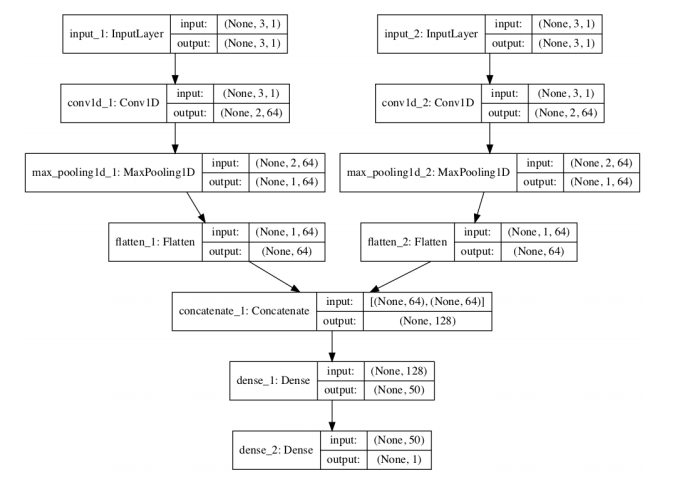

In [17]:
#Second input model
visible2 = Input(shape=(n_steps, n_feature))
cnn2 = Conv1D(filters= 64, kernel_size= 2, activation= 'relu')(visible2)
cnn2 = MaxPooling1D(pool_size=2)(cnn2)
cnn2 = Flatten()(cnn2)

In [18]:
#Merge the cnn model
merge = concatenate([cnn1, cnn2])
dense = Dense(50, activation='relu')(merge)
output = Dense(1)(dense)
model = Model(inputs=[visible1, visible2], outputs = output)
model.compile(optimizer = 'adam', loss = 'mse')

In [20]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 2, 64)        192         input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_2 (Conv1D)               (None, 2, 64)        192         input_3[0][0]                    
______________________________________________________________________________________________

In [19]:
#Fit model
model.fit([X1, X2], y, epochs= 1000, verbose=0)

In [22]:
#Demonstrate prediction
x_input = array([[80,85],[90,95], [100,105]])
x_input1 = x_input[:, 0].reshape((1, n_steps, n_feature))
x_input2 = x_input[:, 1].reshape((1, n_steps, n_feature))
y_hat = model.predict([x_input1, x_input2], verbose=0)
print(y_hat)

[[205.03983]]
